In [ ]:
from autogluon.multimodal import MultiModalPredictor
import os
import time

train_path = os.path.join('data','dentex','training_data','quadrant-enumeration','coco', 'train-quadrant-enumeration-coco.json')

presets = "medium_quality"
# Init predictor
import uuid

model_path = f"./model"
predictor = MultiModalPredictor(
    problem_type="object_detection",
    sample_data_path=train_path,
    presets=presets,
    path= f"./model",
)
start = time.time()
predictor.fit(train_path)  # Fit
train_end = time.time()

In [ ]:
def predict(img_path, predictor = None, model_path=f"./model"):
    if predictor is None:
        predictor = MultiModalPredictor.load(model_path)
        predictor.set_num_gpus(1)
    predictions = predictor.predict({'image': [img_path]})
    predictions = predictions.iloc[0]
    from autogluon.multimodal.utils import ObjectDetectionVisualizer
    visualizer = ObjectDetectionVisualizer(img_path) 
    out = visualizer.draw_instance_predictions(predictions, conf_threshold=0.4)
    visualized = out.get_image() 
    from PIL import Image
    from IPython.display import Image, display
    pil_img = Image(filename=img_path)
    display(pil_img)
    from PIL import Image
    img = Image.fromarray(visualized, 'RGB')
    display(img)

In [ ]:
img_path = os.path.join('test_data','________________0_19890203_382882104_0.jpg')
pil_img = Image(filename=img_path)
display(pil_img)

In [ ]:

predictions = predictor.predict({'image': [img_path]})



In [22]:
predictions = predictions.iloc[0]

In [23]:
from autogluon.multimodal.utils import ObjectDetectionVisualizer
visualizer = ObjectDetectionVisualizer(img_path) 
out = visualizer.draw_instance_predictions(predictions, conf_threshold=0.4)


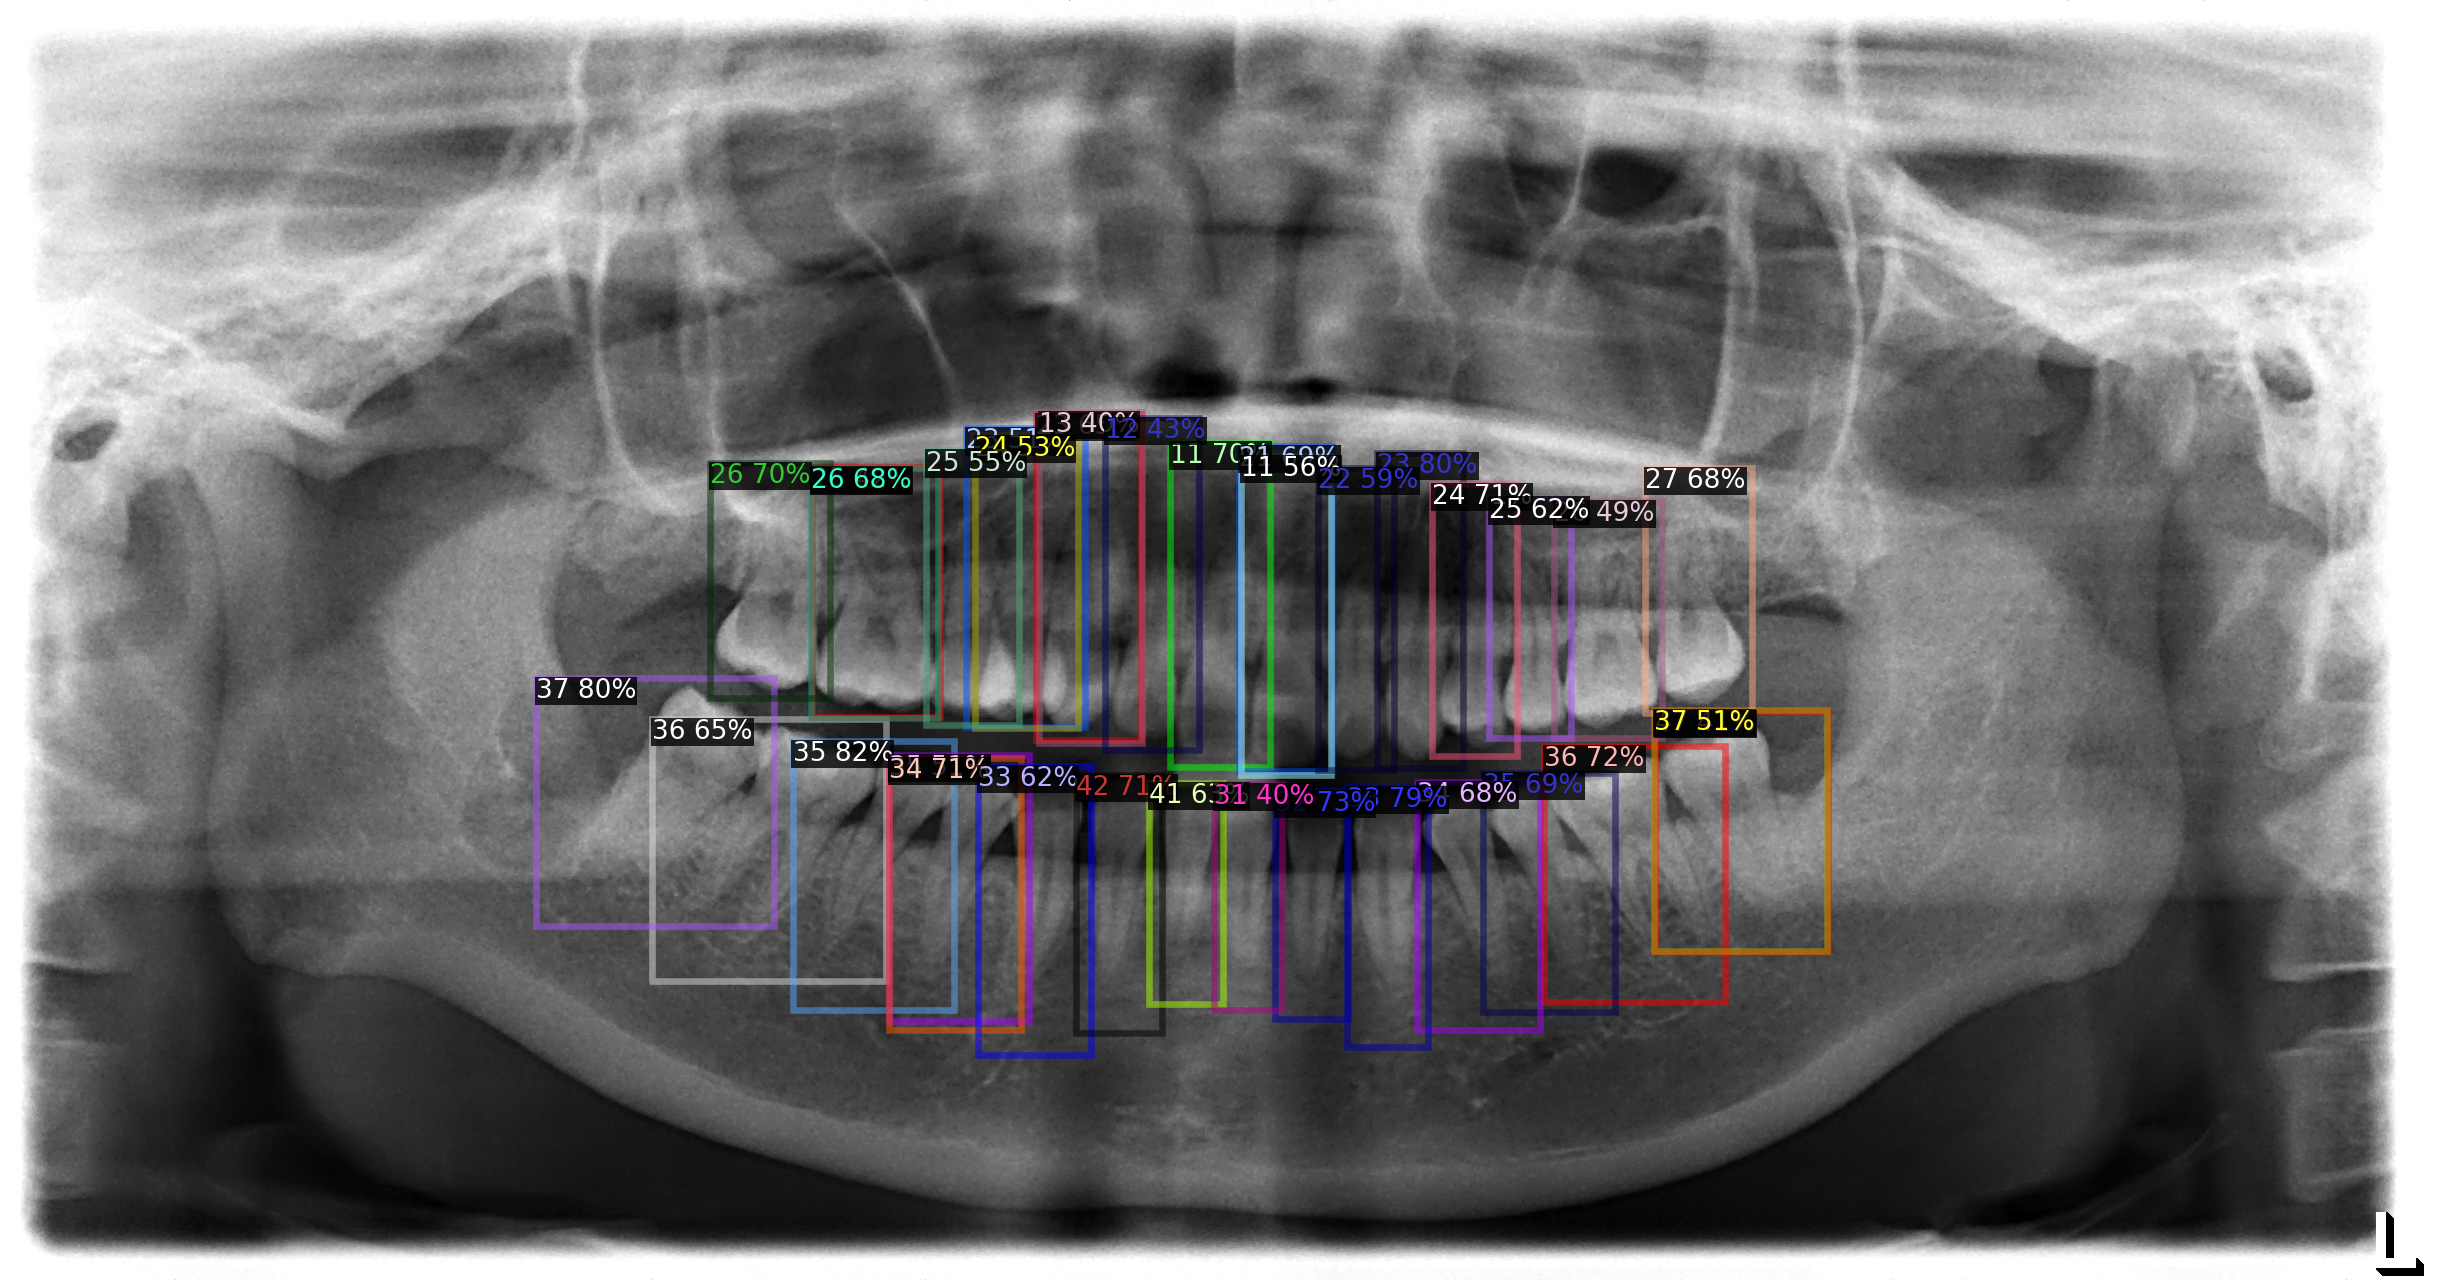

In [25]:
visualized = out.get_image() 
from PIL import Image
img = Image.fromarray(visualized, 'RGB')
display(img)